In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [61]:
df=pd.read_csv("/content/drive/MyDrive/Drive/lsdd.csv")
df

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24798,20.250000,-16.750000,NaN,NaN,NaN,68.8,12.0,0.00,3.6,172.0,17.7,23.7,29.7,22.4,15.60,184,3,95.184093,0.000000,0
24799,20.750000,-16.750000,NaN,NaN,NaN,68.8,11.8,0.00,3.6,170.0,18.0,23.9,29.8,23.2,15.70,182,4,111.561489,0.000000,0
24800,21.250000,-16.750000,NaN,NaN,NaN,68.8,11.6,0.00,3.6,167.5,18.3,24.1,29.9,23.9,15.87,178,5,109.733287,0.000000,0
24801,21.750000,-16.750000,NaN,NaN,NaN,68.8,11.5,0.00,3.6,169.5,18.5,24.2,30.0,24.2,16.30,180,3,103.753469,0.000000,0


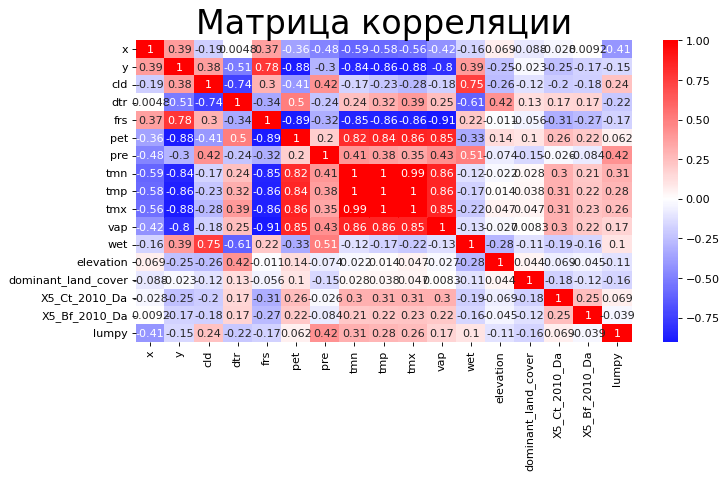

In [3]:
plt.figure(figsize=(10,5), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='bwr', center=0, annot=True)
plt.title('Матрица корреляции', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [62]:
df.isna().sum()

x                          0
y                          0
region                 21764
country                21764
reportingDate          21764
cld                        0
dtr                        0
frs                        0
pet                        0
pre                        0
tmn                        0
tmp                        0
tmx                        0
vap                        0
wet                        0
elevation                  0
dominant_land_cover        0
X5_Ct_2010_Da              0
X5_Bf_2010_Da              0
lumpy                      0
dtype: int64

In [63]:
df = df.drop(['region','country','reportingDate'],axis = 1)
df.fillna(method ="ffill", inplace = True)
df

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24798,20.250000,-16.750000,68.8,12.0,0.00,3.6,172.0,17.7,23.7,29.7,22.4,15.60,184,3,95.184093,0.000000,0
24799,20.750000,-16.750000,68.8,11.8,0.00,3.6,170.0,18.0,23.9,29.8,23.2,15.70,182,4,111.561489,0.000000,0
24800,21.250000,-16.750000,68.8,11.6,0.00,3.6,167.5,18.3,24.1,29.9,23.9,15.87,178,5,109.733287,0.000000,0
24801,21.750000,-16.750000,68.8,11.5,0.00,3.6,169.5,18.5,24.2,30.0,24.2,16.30,180,3,103.753469,0.000000,0


In [64]:
x=df.drop(["lumpy"],axis=1)
y=df["lumpy"]


In [65]:
from sklearn.linear_model import LogisticRegression


In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')


Train dataset size: (17362, 16), (17362,)
Test dataset size: (7441, 16), (7441,)


In [67]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)


Веса всех признаков (w1):  [[-4.27898154e-03  8.49226734e-02  4.31872768e-02 -7.05905857e-02
   1.65596950e-02 -1.76744160e-02  2.12797923e-02  1.03747878e-01
   6.82920379e-02  3.37624032e-02 -8.12548493e-02 -8.56917210e-02
  -3.86330541e-02 -6.06967500e-02  4.97458302e-05 -1.03471548e-03]]
Свободный коэффицент уравнения w0: [-0.00046648]


In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test,pred)

array([[6302,  188],
       [ 436,  515]])

In [74]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 6302
FP: 188
FN: 436
TP: 515


In [75]:
(tp + tn) / (tp + tn + fp + fn)

0.9161403037226179

In [76]:
accuracy_score(y_test, pred)


0.9161403037226179

In [77]:
recall = tp / (tp + fn)
recall

0.5415352260778128

In [78]:
recall_score(y_test, pred)


0.5415352260778128

In [79]:
precision = tp / (tp + fp)
precision

0.732574679943101

In [80]:
precision_score(y_test, pred)


0.732574679943101

In [81]:
f1 = 2 * precision * recall / (recall + precision)
f1

0.6227327690447401

In [82]:
f1_score(y_test, pred)


0.6227327690447401

Все метрики приблизительно равны 1- результат практически идеальный